<a href="https://colab.research.google.com/github/jungwoo1208/AI_Study/blob/main/softmax_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("device: ", device)

device:  cuda


In [5]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [6]:
training_epochs=100
batch_size=64

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762))  # CIFAR-100 평균/표준편차
])

# CIFAR-100 데이터셋 다운로드 및 적용
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# DataLoader: 배치로 묶기
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

100%|██████████| 169M/169M [00:13<00:00, 12.8MB/s]


In [11]:
linear = nn.Linear(3072,100, bias=True).to(device)

In [12]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [13]:
for epoch in range (training_epochs+1):
  avg_cost= 0
  total_batch = len(train_loader)
  for X,Y in train_loader:
    X = X.view(-1,3072).to(device)
    Y = Y.to(device)
    optimizer.zero_grad()
    hypothesis= linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost / total_batch
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 8.027421951
Epoch: 0002 cost = 7.286006927
Epoch: 0003 cost = 6.959771633
Epoch: 0004 cost = 6.697037697
Epoch: 0005 cost = 6.519629955
Epoch: 0006 cost = 6.263532162
Epoch: 0007 cost = 6.314746380
Epoch: 0008 cost = 6.137294292
Epoch: 0009 cost = 5.974556446
Epoch: 0010 cost = 5.969079018
Epoch: 0011 cost = 5.882729530
Epoch: 0012 cost = 5.824352264
Epoch: 0013 cost = 5.729825497
Epoch: 0014 cost = 5.732682705
Epoch: 0015 cost = 5.581794262
Epoch: 0016 cost = 5.551756859
Epoch: 0017 cost = 5.479755402
Epoch: 0018 cost = 5.558799744
Epoch: 0019 cost = 5.474016190
Epoch: 0020 cost = 5.454190254
Epoch: 0021 cost = 5.390912533
Epoch: 0022 cost = 5.281637192
Epoch: 0023 cost = 5.202342987
Epoch: 0024 cost = 5.256628513
Epoch: 0025 cost = 5.135346889
Epoch: 0026 cost = 5.040235043
Epoch: 0027 cost = 5.070560932
Epoch: 0028 cost = 5.048965454
Epoch: 0029 cost = 5.071504116
Epoch: 0030 cost = 5.056182384
Epoch: 0031 cost = 5.035630703
Epoch: 0032 cost = 4.870474815
Epoch: 0

Accuracy of the batch: 7.81%


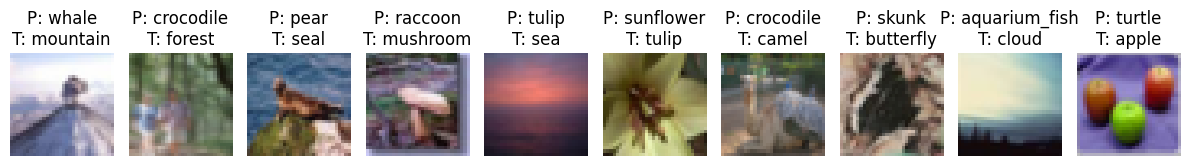

In [30]:
linear.eval()

# 클래스 이름 불러오기 (CIFAR-100의 클래스 라벨)
classes = train_dataset.classes  # 예: ['apple', 'aquarium_fish', ...]

# 한 배치만 가져오기
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 reshape (batch, 3, 32, 32) → (batch, 3072)
X = images.view(-1, 3072).to(device)
Y = labels.to(device)

# 예측
with torch.no_grad():
    outputs = linear(X)
    _, predicted = torch.max(outputs, 1)

# 정확도 계산
correct = (predicted == Y).sum().item()
total = Y.size(0)
accuracy = correct / total * 100
print(f'Accuracy of the batch: {accuracy:.2f}%')

# 이미지 보여주기용 함수
def imshow(img):
    img = img.cpu().numpy().transpose((1, 2, 0))  # (C, H, W) → (H, W, C)

    # 정규화 복원
    mean = np.array([0.5071, 0.4865, 0.4409])
    std = np.array([0.2673, 0.2564, 0.2762])
    img = std * img + mean
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.axis('off')

# 처음 5개 이미지 시각화 + 예측 결과
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(1, 10, i+1)
    imshow(images[i])
    plt.title(f'P: {classes[predicted[i]]}\nT: {classes[labels[i]]}')
plt.tight_layout()
plt.show()
